In this file we can test the performance of multiple TST structures, for various datasets and assess the time every execution takes. 

In [65]:
import random
import time
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

from ternary_tree import TernarySearchTree
from ternary_tree_B import TernarySearchTreeB
from ternary_tree_minimalistic import TernarySearchTreeSparse 
from ternary_tree_recursive import TernarySearchTree_Recursive
from btree import Btree


with open('data/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]
    
with open('data/words_alpha.txt') as file:
    words = [line.strip() for line in file]
    
sizes = [10, 100, 1000, 10000, 50000, 100000, 300000]  ## increasing the sample size with the words_alpha dataset
samples = [
    random.sample(words, k=size) for size in sizes
]

# Insertion time Assessment

In [80]:
nr_runs = 100
times = {"recursive": {}, "iterative": {}, "sparse": {}, "btree": {}}
insert_sample = random.sample(words, k=20)
for sample in samples:
    tsts = {
    "recursive": TernarySearchTree(),
    "iterative": TernarySearchTreeB(),
    "sparse": TernarySearchTreeSparse(),
    "btree": Btree()
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tst_name, tst in tsts.items():
            start_time = time.time_ns()
            for word in insert_sample:
                tst.insert(word)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'recursive': {10: 0.156138,
  100: 0.207957,
  1000: 0.212239,
  10000: 0.125792,
  50000: 0.326639,
  100000: 0.050893,
  300000: 0.192863},
 'iterative': {10: 0.089574,
  100: 0.035148,
  1000: 0.036108,
  10000: 0.023938,
  50000: 0.0,
  100000: 0.22373,
  300000: 0.011767},
 'sparse': {10: 0.07043,
  100: 0.08112,
  1000: 0.110368,
  10000: 0.235503,
  50000: 0.184626,
  100000: 0.261207,
  300000: 0.150378},
 'btree': {10: 0.059494,
  100: 0.057167,
  1000: 0.041252,
  10000: 0.127881,
  50000: 0.0,
  100000: 0.020048,
  300000: 0.184512}}

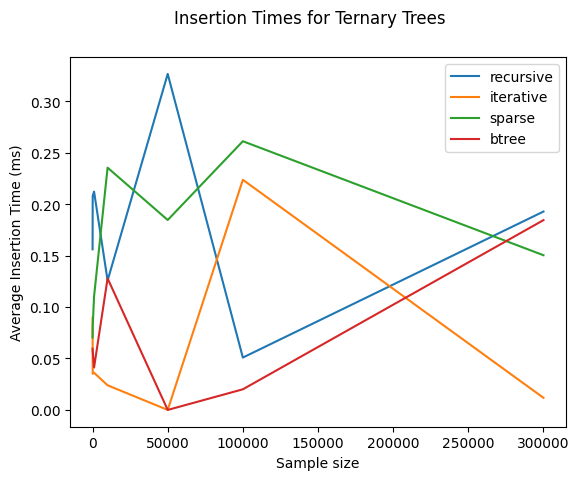

In [81]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Insertion Time (ms)")
plt.suptitle("Insertion Times for Ternary Trees")
plt.legend()


# Exact Searching time Assessment

In [75]:
nr_runs = 100
times = {"recursive": {}, "iterative": {}, "sparse": {}, "btree": {}}
exact_search_sample = random.sample(words, k=20)

for sample in samples:
    tsts = {
    "recursive": TernarySearchTree(),
    "iterative": TernarySearchTreeB(),
    "sparse": TernarySearchTreeSparse(),
    "btree": Btree()
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tst_name, tst in tsts.items():
            start_time = time.time_ns()
            for word in exact_search_sample:
                tst.search(word, exact=True)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'recursive': {10: 0.014589,
  100: 0.158928,
  1000: 0.079102,
  10000: 0.125919,
  50000: 0.030464,
  100000: 0.026509,
  300000: 0.023245},
 'iterative': {10: 0.083393,
  100: 0.024708,
  1000: 0.051718,
  10000: 0.074009,
  50000: 0.156732,
  100000: 0.0,
  300000: 0.144359},
 'sparse': {10: 0.011858,
  100: 0.070164,
  1000: 0.047134,
  10000: 0.130326,
  50000: 0.133706,
  100000: 0.010598,
  300000: 0.292418},
 'btree': {10: 0.050637,
  100: 0.050763,
  1000: 0.126451,
  10000: 0.103928,
  50000: 0.176625,
  100000: 0.356925,
  300000: 0.039353}}

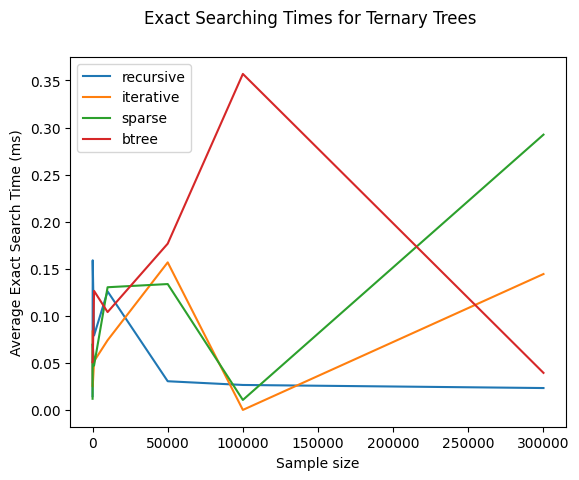

In [76]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Exact Search Time (ms)")
plt.suptitle("Exact Searching Times for Ternary Trees")
plt.legend()


# Prefixes Searching time Assessment

In [78]:
nr_runs = 100
times = {"recursive": {}, "iterative": {}, "sparse": {}, "btree": {}}
search_sample = random.sample(words, k=20)

for sample in samples:
    tsts = {
    "recursive": TernarySearchTree(),
    "iterative": TernarySearchTreeB(),
    "sparse": TernarySearchTreeSparse(),
    "btree": Btree()   
    }
    for word in sample:
        for tst_name, tst in tsts.items():
            tst.insert(word)
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] = 0.0
        
    for _ in range(nr_runs):
        for tst_name, tst in tsts.items():
            start_time = time.time_ns()
            for word in search_sample:
                tst.search(word, exact=False)
            end_time = time.time_ns()
            times[tst_name][len(sample)] += end_time - start_time
    
    for tst_name in tsts.keys():
        times[tst_name][len(sample)] /= nr_runs * 1_000_000.0

times

{'recursive': {10: 0.060216,
  100: 0.03394,
  1000: 0.062273,
  10000: 0.058929,
  50000: 0.179313,
  100000: 0.094167,
  300000: 0.179416},
 'iterative': {10: 0.01702,
  100: 0.087124,
  1000: 0.064607,
  10000: 0.138576,
  50000: 0.029562,
  100000: 0.057506,
  300000: 0.0},
 'sparse': {10: 0.029556,
  100: 0.083156,
  1000: 0.108707,
  10000: 0.141614,
  50000: 0.164296,
  100000: 0.058824,
  300000: 0.126631},
 'btree': {10: 0.042088,
  100: 0.036576,
  1000: 0.068309,
  10000: 0.150471,
  50000: 0.09123,
  100000: 0.161152,
  300000: 0.134901}}

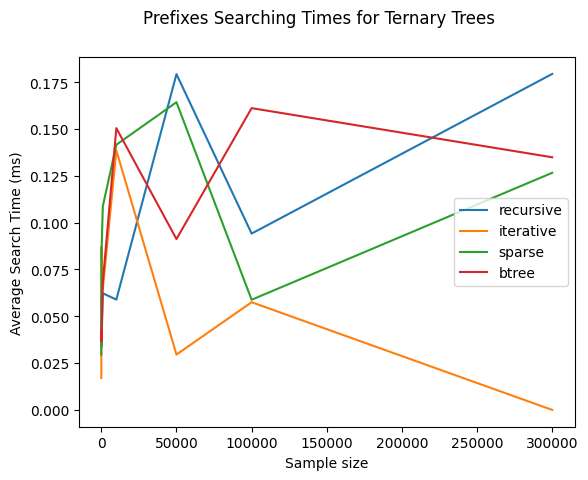

In [79]:
for tst_name, time_data in times.items():
    plt.plot(time_data.keys(), time_data.values(), label=tst_name)
    
plt.xlabel("Sample size")
plt.ylabel("Average Search Time (ms)")
plt.suptitle("Prefixes Searching Times for Ternary Trees")
plt.legend()


## Graphical Representation of the Tree

In [72]:
class TSTVisualizer:
    def __init__(self, tst):
        self.graph = nx.DiGraph()
        self._build_graph(tst._root, None, "")

    def _build_graph(self, node, parent, prefix):
        if node and node._character:
            node_label = f"{prefix}{node._character}"
            self.graph.add_node(node_label)
            
            if parent:
                self.graph.add_edge(parent, node_label)

            self._build_graph(node._lt, node_label, prefix)
            self._build_graph(node._equals, node_label, prefix + node._character)
            self._build_graph(node._gt, node_label, prefix)

    def visualize(self):
        pos = graphviz_layout(self.graph, prog="dot")  # Use Graphviz hierarchical layout
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", font_size=8, node_size=100, arrows=True)
        plt.title("Ternary Search Tree Structure")
        plt.show()

class BtreeVisualizer:
    def __init__(self, btree):
        self.graph = nx.DiGraph()
        self._build_graph(btree._root, None)

    def _build_graph(self, node, parent):
        if node:
            node_label = node._string
            self.graph.add_node(node_label)

            if parent:
                self.graph.add_edge(parent, node_label)

            self._build_graph(node._lt, node_label)
            self._build_graph(node._gt, node_label)

    def visualize(self):
        pos = graphviz_layout(self.graph, prog="dot")  # Use hierarchical layout
        plt.figure(figsize=(8, 6))
        nx.draw(self.graph, pos, with_labels=True, node_color="lightblue", edge_color="gray",
                font_size=8, node_size=1000, arrows=True)
        plt.title("Binary Search Tree Structure")
        plt.show()


In [35]:
import random
tst = TernarySearchTree()
tst2 = TernarySearchTree()
bt = Btree()
bt2 = Btree()

with open('data/insert_words.txt') as file:
    words = [line.strip() for line in file]

insert_sample = sorted(words)
for word in words:
    tst.insert(word)
    bt.insert(word)

for word in insert_sample:
    tst2.insert(word)
    bt2.insert(word)

visualizer = TSTVisualizer(tst)
visualizer.visualize()
visualizer2 = TSTVisualizer(tst2)
visualizer2.visualize()
visualizer3 = BtreeVisualizer(bt)
visualizer3.visualize()
visualizer4 = BtreeVisualizer(bt2)
visualizer4.visualize()

NameError: name 'Btree' is not defined